# Entendimento das redes neurais recorrentes

- Redes neurais, em geral, não guardam informações na memória
- Rede aplicada ao IMDB: treino utilizando cada review como um todo => **feedfoward network**

- Processo de leitura do ser humano: processamento incremental, com informações mantidas na memória e entendidas conforme se lê

-  **Rede neural recorrente**: versão simplificada da leitura humana => processamento das sequências de texto sem perder a memória/contexto das sequências anteriores.

![alt text](https://miro.medium.com/max/824/1*FKOv5k_7x0kW5lXbltMiCQ.png)

- Ainda assim, uma RNN considera um review por vez e de forma independente

### Implementação simplificada em Numpy

In [0]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

> RNN é um código em laço que reutiliza quantidades calculadas em iterações anteriors. Um das principais características de uma RNN é a **step function** utilizada.

![alt text](https://www.researchgate.net/profile/Filippo_Maria_Bianchi/publication/320970557/figure/fig3/AS:667605689978886@1536181008310/The-diagram-depicts-the-RNN-from-Fig-1-being-unfolded-or-unrolled-into-a-FFNN-As-we.png)

### RNN no Keras

- Ao contrário da implementação simplificada com Numpy, a rede SimplesRNN processa os dados em *batch* ao invés de toda a sequência de uma vez só.
- Dois modos diferentes: retorna a sequência inteira de sucessivos outputs ou apenas o último output para cada sequência. (comando *return_sequences*)


In [0]:
# Último output
from keras.layers import SimpleRNN

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Sequência completa de outputs
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Multiplas camadas e retorno de toda a sequência de outputs

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


# Aplicação nos Reviews do IMDB

### Preparo dos dados

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence


max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Treino dos Reviews com SimpleRNN

In [0]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 21s 1ms/step - loss: 0.6283 - acc: 0.6367 - val_loss: 0.5579 - val_acc: 0.7020
Epoch 2/10
20000/20000 [==============================] - 20s 980us/step - loss: 0.3867 - acc: 0.8371 - val_loss: 0.4700 - val_acc: 0.7926
Epoch 3/10
20000/20000 [==============================] - 20s 984us/step - loss: 0.2837 - acc: 0.8898 - val_loss: 0.4403 - val_acc: 0.8266
Epoch 4/10
20000/20000 [==============================] - 20s 984us/step - loss: 0.2350 - acc: 0.9130 - val_loss: 0.6915 - val_acc: 0.7412
Epoch 5/10
20000/20000 [==============================] - 19s 973us/step - loss: 0.1607 - acc: 0.9428 - val_loss: 0.3769 - val_acc: 0.8408
Epoch 6/10
20000/20000 [==============================] - 20s 991us/step - loss: 0.1079 - acc: 0.9621 - val_loss: 0.4932 - val_acc: 0.7892
Epoch 7/10
2000

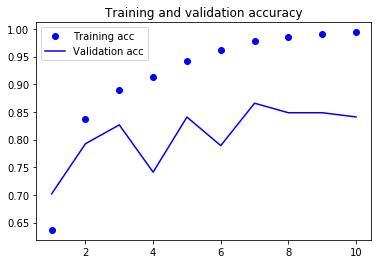

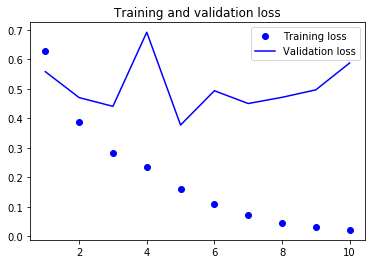

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## LSTM e GRU Layers

Além da SimpleRNN, o Keras ainda apresenta outras duas possibilidades de camada de recorrência: LSTM e GRU, que foram projetadas para evitar o 'esquecimento' das sequências anteriores no treinamento de redes em sequências de texto. Focaremos apenas na LSTM.

-------
## LSTM (Long Short-Term Memory, *memória de longo prazo*)

Soluciona o problema de *vanising gradient problem*, que é responsável por 'esquecer' as sequências prévias, transportando informações por vários timesteps.
![alt text](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/06fig14_alt.jpg)

### Exemplo no Keras, com o IMBD



In [0]:
# importantdo a camada
from keras.layers import LSTM

#Criando as camadas
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

#definindo os parâmetros de treino
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

#Treinando o modelo
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 99s 5ms/step - loss: 0.5049 - acc: 0.7541 - val_loss: 0.4231 - val_acc: 0.8002
Epoch 2/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.2905 - acc: 0.8855 - val_loss: 0.2784 - val_acc: 0.8876
Epoch 3/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.2338 - acc: 0.9113 - val_loss: 0.2827 - val_acc: 0.8824
Epoch 4/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.1992 - acc: 0.9263 - val_loss: 0.3349 - val_acc: 0.8848
Epoch 5/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.1763 - acc: 0.9362 - val_loss: 0.3173 - val_acc: 0.8930
Epoch 6/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1561 - acc: 0.9440 - val_loss: 0.4019 - val_acc: 0.8596
Epoch 7/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.1441 - acc: 0.9493 - val_loss: 0.3599 - val_acc

- Acurácia com SimpleRNN: 0.84
- Acurácia com LSTM: 0.87

> Leve melhora devido ao 'não esquecimento' (*vanishing-gradient problem*). Poderia ter melhores resultados se:

- feito o ajuste de hyperparâmetros 
- regularização 

Entretanto, LSTM não é tão efetivo em **análise de sentimento** quanto é em problemas mais complexos, como por exemplo a análise de **traduções**.


--------------
--------------
## Recapitulando...
-  RNNs: redes neurais recorrentes que são treinadas considerando a sequência como um todo. Exemplo: SimpleRNN.
-  LSTM: uma RNN que diminuiu a questão do *vanishing-gradient problem*, uma espécie de esquecimento em sequências muito longas e que é muito melhor que uma SimpleRNN